# DATA CLEANING

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy.random as rnd
import numpy as np

## Smoothing Functions:
Suppose we have an array A of size n and we have to perform a smoothening of Order o. In this process we will take an unclean and random data, the replace each of its data point with average of points from o steps backward to o steps forward. We can do this in two ways.
* First by plugging in flattened values or averages and here the process at each node is independent of those at other nodes.
* Secondly we start smoothening from one end and for averaging, one side has smoothened values already. This method is direction dependant.

The formula for averaging is 
$A[i](i_{max}- i_{min})= \sum_{j = i_{min}}^{i_{max}} A[j]$ where  $i_{max} = min(n-1,i+o)$ and $i_{min} = max(0,i-o)$ <br>
The code for first method and second method is given below


In [2]:
def smoothen1(A,o): #first method
    B = A + 0
    n = np.size(A)
    for i in range(n):
        up = np.min([n-1,i+o])
        lw = np.max([0,i-o])
        s= 0
        no = 0 
        for j in range(lw,up+1):
            s = s + A[j]
            no = no + 1
        B[i] = s/no
    return B

def smoothen2(A,o,dr = True): #second method where dr = True means forward and dr = False means backward
    B = A + 0
    n = np.size(A)
    if dr:
        for i in range(n):
            up = np.min([n-1,i+o])
            lw = np.max([0,i-o])
            s= 0
            no = 0 
            for j in range(lw,up+1):
                s = s + B[j]
                no = no + 1
            B[i] = s/no
    else :
        for i_ in range(n):
            i = n-1 - i_
            up = np.min([n-1,i+o])
            lw = np.max([0,i-o])
            s= 0
            no = 0 
            for j in range(lw,up+1):
                s = s + B[j]
                no = no + 1
            B[i] = s/no
        
    return B


To demonstrate its working we shall try cleaning a corrupted sine wave, where the noise is of gaussian nature and standard deviation is 10% of the amplitude.
$$\large{f(t) = Asin(\omega t)  + \zeta}$$ 
$$PDF(\zeta) = \frac{1}{\sqrt{2\pi fA}}\large{e} ^{\normalsize{-\dfrac{\zeta^2}{2f^2A^2}}}$$ where f is 0.1

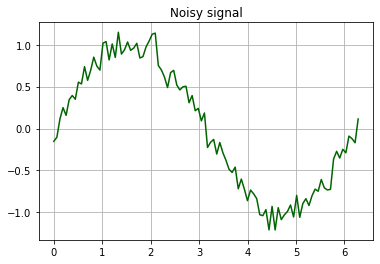

<br> 
We have plotted the noisy signal vs time. Now lets see the cleaned results for various orders of first smoothening function. It can be seen that as the order increases the graph tends to cancel out the noise but lets see the error functions.

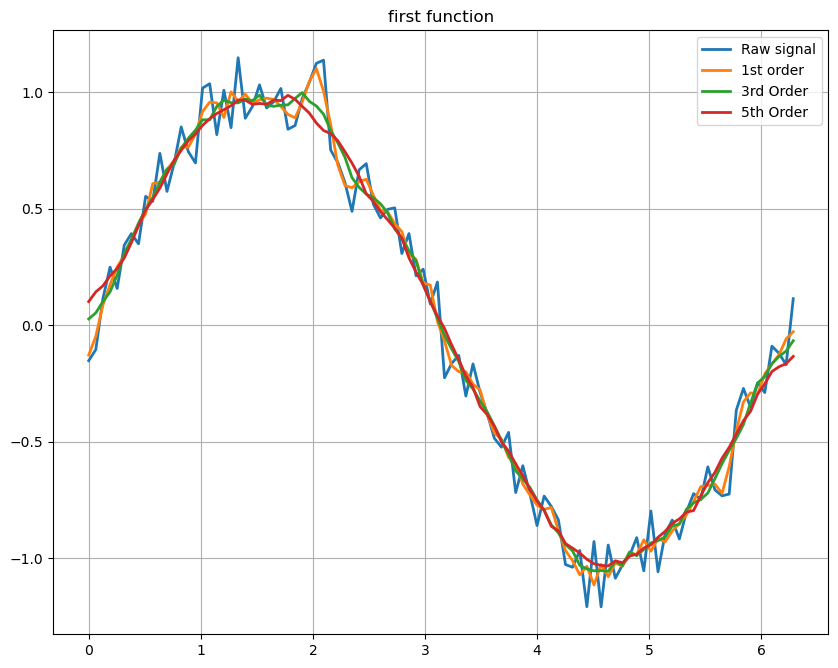

For conceptualising an error function we need a norm kind of definition which is rms value of error.<br>
$$||F|| = \sqrt{avg (||F[sig] - Asin(\omega t)||^2)}$$
$$Norm(o) = \sqrt{avg({(F_o[sig(t)] - Asin(\omega t))}^2)}$$
Let us analyse some plots regarding this test model 

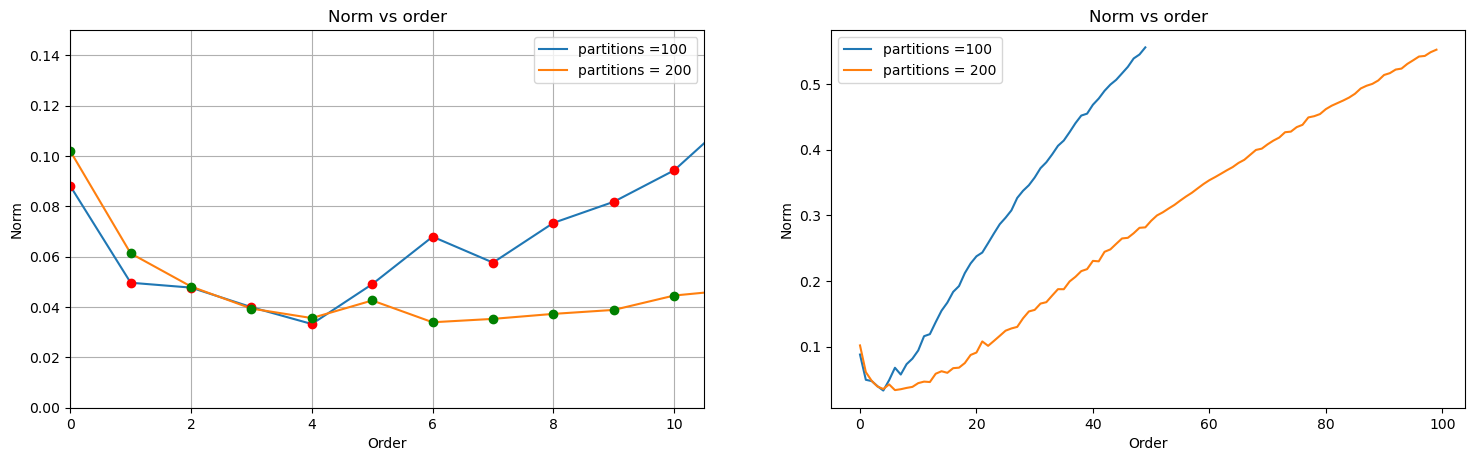

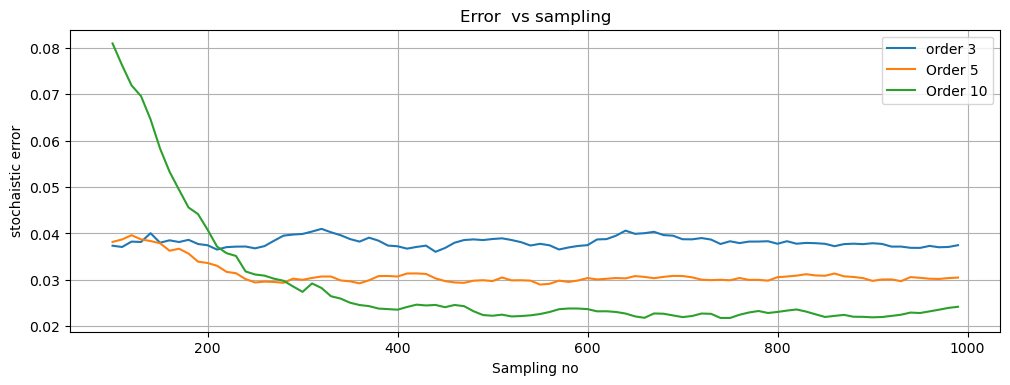

Our earlier misconception that order increase reduces the stochaistic error has been overthrown in favour of an optimising order for each sampling partitons. The smoothened version of above curve shows that for larger orders the ones with better sampling rate gives the best cleaning results. All these analysis has been done for first function. Second function is also expected to give similar results.

#### A small demonstration of Forward and Backward Smoothing for 2nd type


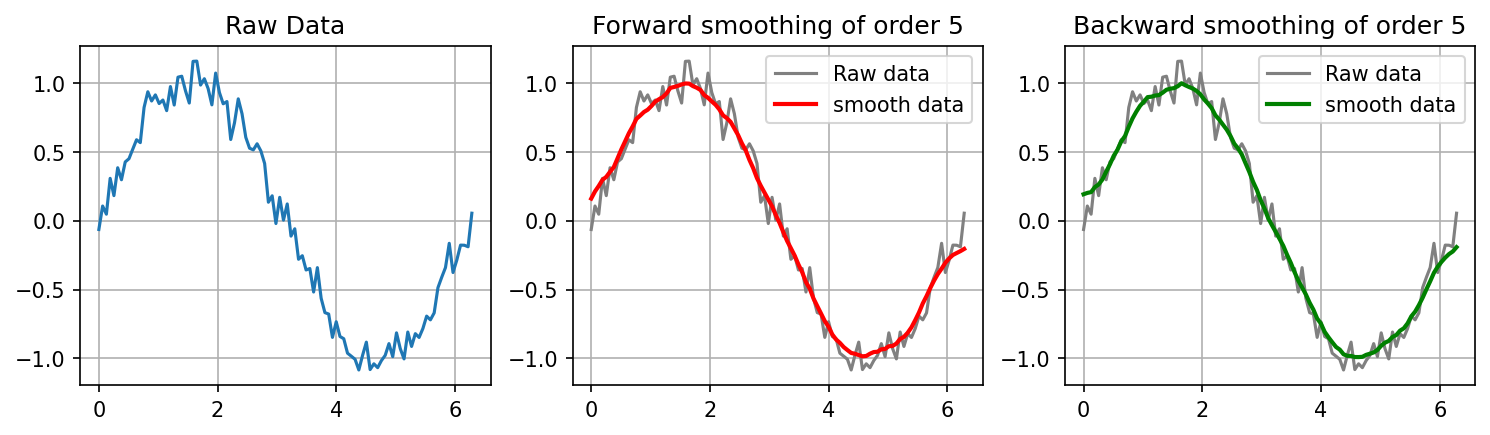

There are slight differences in forward and backward smoothening and it can be shown as part of error ie deviation from base sign.

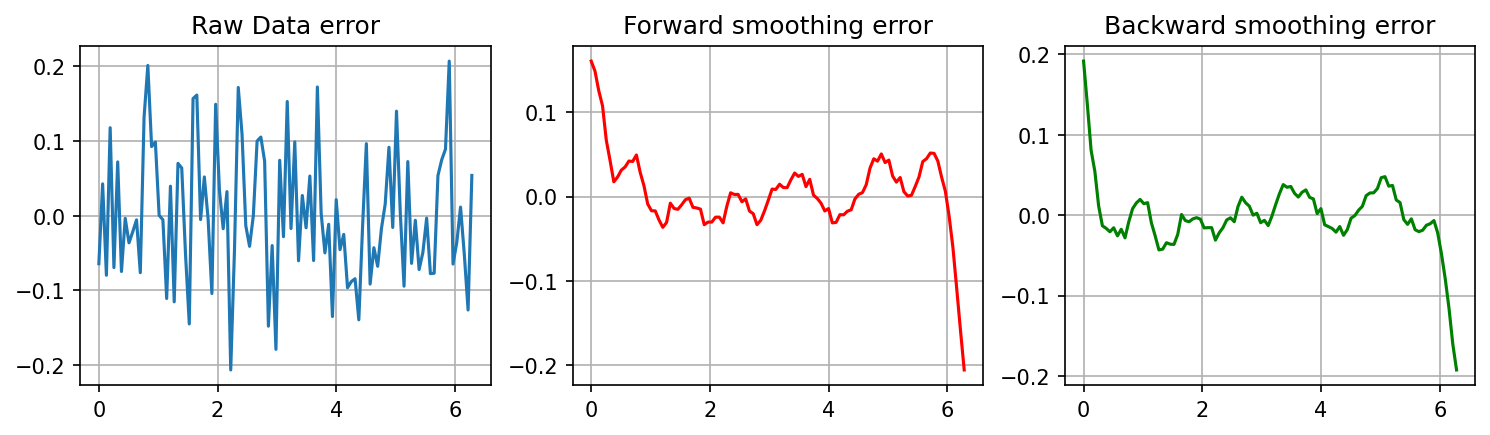

So lets develop a theoretical model to explain this phenomenon. Let the order be n and i be the itarate we are going to smoothen. Let $\bar{x_i} = x_i + \zeta_i$ where $\zeta_i$ is the **Gaussian Noise**. Let $\tilde{x_i}$ be the smoothened value and it is given by $$\tilde{x_i}= \frac{1}{2n+1}\sum_{i-n}^{i+n}x_j + \tilde{\zeta_i} $$
<br>
$$\text{where  } \tilde{\zeta_i} = \frac{1}{2n+1}\sum_{i-n}^{i+n}\zeta_j$$
The averaged noise $\tilde{\zeta_i}$is a good esitmator for the mean zero and its deviation is lower than normal noise by a factor of $\frac{1}{\sqrt{2n+1}}$ that almost follows a normal distribution. Even if the noise is not gaussian but with zero mean , the estimator follows a gaussian pattern. Now lets calculate the error from actual data.
$$e_i = \frac{1}{2n+1}\sum_{i-n}^{i+n}(x_j - x_i)  + \tilde{\zeta_i}$$
Assuming uniform sampling $x_i = x(t_i) = x(t_0 + ih)$ , we can apply taylor series to simplify the first term of the error expression. $$x(t + \Delta t) + x(t - \Delta t) = 2x(t) + \Delta t ^2 x"(t) + \mathcal{O}(\Delta t ^4) \\
e_i = \frac{n(n+1)}{6}\ddot{x_i}h^2 + \tilde{\zeta_i} + \mathcal{O}(h^4)
$$
We can develop a good estimator for smoothing error as $|e| \approx |\dfrac{n(n+1)}{6}\ddot{x}h^2 |+ \dfrac{\sigma }{\sqrt{2n+1}} $


## FILTERS:
Another innovative method is to break down the noisy signal using discrete fourier transform and